In [77]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [78]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from tqdm import tqdm
from itertools import product

In [79]:
def tilde(x, delta=0, m=0):
    return np.sqrt(2) * x - (m+delta)/np.sqrt(2)

In [80]:
def phi(t):
    return (1/np.sqrt(2 * np.pi)) * np.exp(-(t**2) / 2)

In [81]:
def PHI(x, loc=0, scale=1):
    return stats.norm.cdf(x, loc=loc, scale=scale)

In [82]:
def minmax(a,b,delta,m,alpha, off, mu):
    E1 = PHI(b- mu) - PHI(b-delta) + PHI(a-delta) - PHI(a-mu)
    E2 = (np.exp(-((m-delta)/2)**2)/np.sqrt(2)) * (off + (alpha -1 )*(PHI(tilde(b,delta=delta, m=m)) - 
                                                                      PHI(tilde(a,delta=delta, m=m))))
    return E1 - E2


In [83]:
def Nash(range_max, step, m, alpha, off, mu, a, print_mode=False):
    x = np.arange(-range_max,range_max,step)
    y =  np.arange(-range_max,range_max,step)
    X, Y = np.meshgrid(x, y)
    Z = minmax(a,X,Y,m,alpha, off, mu)
    if print_mode:
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=True, shade=False)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.xlabel("b", fontsize="x-large")
        plt.ylabel("delta", fontsize="x-large")
        plt.show()
        plt.close()
    size = Z.shape[0]
    nash, b, delta, z_nash = False, None, None, None
    for i, j in product(range(size), range(size)):
        z = Z[i,j]
        zd = max([Z[i,k] for k in range(size)])
        zg = min([Z[l,j] for l in range(size)])
        if z == zd and z == zg:
            if print_mode:
                print("Nash")
            nash = True
            b = x[i]
            delta = y[j]
            z_nash = z
            break
    return nash, b, delta, z

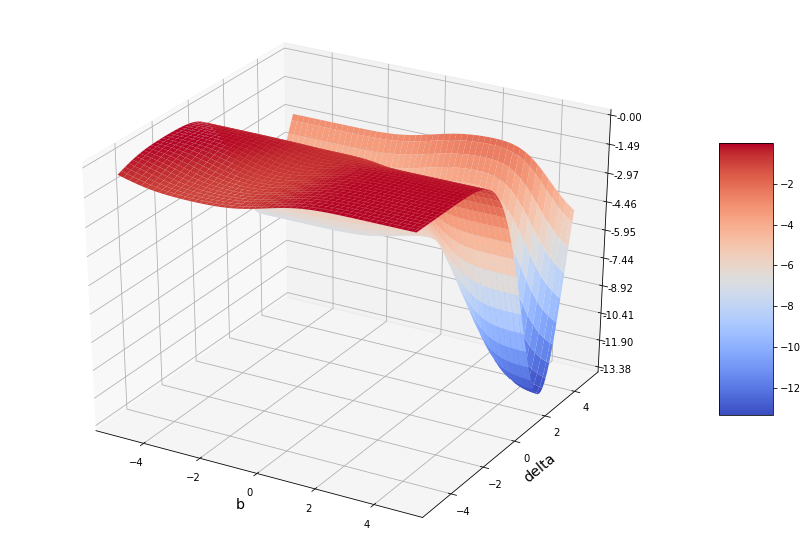

Nash


(True, 2.9999999999999716, 1.199999999999978, -6.256781612427345)

In [84]:
range_max = 5
step = .1
mu = 0
a = -100000
m = 3
alpha, off = 10, 10
Nash(range_max=range_max,
     step=step, 
     m=m, 
     alpha=alpha, 
     off=off, 
     mu=mu, 
     a=a, 
     print_mode=True)

In [85]:
def Nash_on_m(m_min, m_max, m_step, range_max, step, alpha,off,mu,a,print_mode):
    tested_m = np.arange(m_min,m_max,m_step)
    Bs, Ds, Zs = [], [], []
    for m in tqdm(tested_m):
        nash, b, delta, z_nash = Nash(range_max=range_max,
                                 step=step, 
                                 m=m, 
                                 alpha=alpha, 
                                 off=off, 
                                 mu=mu, 
                                 a=a, 
                                 print_mode=False)
        if nash:
            Bs.append(b)
            Ds.append(delta)
            Zs.append(z_nash)
    if print_mode:
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(Bs, Ds, Zs)
        ax.set_xlabel('b')
        ax.set_ylabel('delta')
        ax.set_zlabel('Z')
        plt.title("Nash equilibriums")
        plt.show()
        plt.close()
    return Bs, Ds, Zs

In [ ]:
b_list, delta_list, z_list = Nash_on_m(m_min=0, m_max=10, m_step=.1, range_max=10, step=.1, alpha=alpha,off=off,mu=mu,a=a,print_mode=True)

  7%|▋         | 7/100 [00:15<03:35,  2.32s/it]